In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Loading the data
To get started let's first load in the data! We will make use of the helper functions provided in `data_utils.py`

In [2]:
from data_utils import get_images, get_labels

The following is the list of disasters in our dataset. 

In [3]:
disaster_list = ["hurricane-matthew", "socal-fire", "midwest-flooding"]

We will load each disaster train dataset into a dictionary. Recall that each disaster consists of images and labels (0 - 3) of the damage level.

In [4]:
data = {}
split = "train"
with open('config.json') as config_file:
    config = json.load(config_file)
    data_dir = config['data_dir']

for disaster in disaster_list:
    print(f"Loading {split} images and labels for {disaster} dataset...")
    images = get_images(data_dir, disaster, split=split)
    labels = get_labels(data_dir, disaster, split=split)
    data[disaster] = {"images": images, "labels": labels}

Loading train images and labels for hurricane-matthew dataset...
Loading train images and labels for socal-fire dataset...
Loading train images and labels for midwest-flooding dataset...


### Data overview for images
* How many data(images and labels) do we have for each category
* What's the shape of each data

In [50]:
import pandas as pd

rows = []
for key in data.keys():
    images_count = len(data[key]["images"])
    labels_count = len(data[key]["labels"])
    image_type = type(data[key]["images"][0])
    image_shapes_first_5 = [data[key]["images"][i].shape for i in range(5)]
    label_type = type(data[key]["labels"][0])
    
    rows.append({
        "Disaster Type": key,
        "Images Count": images_count,
        "Labels Count": labels_count,
        "Image type": image_type,
        "Image Shapes (first 5)": image_shapes_first_5,
        "Label type": label_type
    })

df = pd.DataFrame(rows)
df


,Disaster Type,Images Count,Labels Count,Image type,Image Shapes (first 5),Label type
0,hurricane-matthew,11151,11151,<class 'numpy.ndarray'>,"[(65, 54, 3), (67, 105, 3), (54, 56, 3), (114,...",<class 'numpy.int64'>
1,socal-fire,8380,8380,<class 'numpy.ndarray'>,"[(144, 195, 3), (48, 51, 3), (104, 140, 3), (1...",<class 'numpy.int64'>
2,midwest-flooding,7004,7004,<class 'numpy.ndarray'>,"[(42, 176, 3), (163, 189, 3), (72, 72, 3), (46...",<class 'numpy.int64'>


In [51]:
label_counts = {}
for disaster in disaster_list:
    label_counts[disaster] = pd.Series(data[disaster]["labels"]).value_counts()
df = pd.DataFrame(label_counts)
df.loc['Sum'] = df.sum()
df

,hurricane-matthew,socal-fire,midwest-flooding
0,2631,7204,6734
1,5236,69,114
2,1544,43,97
3,1740,1064,59
Sum,11151,8380,7004


### Check if there are missing images

In [56]:
for key in data.keys():
    missing_indices = []
    for i, img in enumerate(data[key]["images"]):
        if img is None or not isinstance(img, np.ndarray) or img.size == 0:
            missing_indices.append(i)
    if missing_indices:
        print(f"{key} has missing or invalid images at indices: {missing_indices}")
print(missing_indices)

[]


In [57]:
for key in data.keys():
    zero_images_indices = []
    for i, img in enumerate(data[key]["images"]):
        if np.all(img == 0):
            zero_images_indices.append(i)
    if zero_images_indices:
        print(f"{key} has images filled with all zeros at indices: {zero_images_indices}")
print(zero_images_indices)

[]


### Visualize an image and its label in the dataset. 

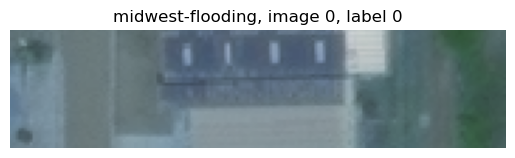

image shape: (42, 176, 3)


In [28]:
disaster = disaster_list[2]
images = data[disaster]["images"]
labels = data[disaster]["labels"]

# index of the image to display
idx = 0
img = images[idx]
label = labels[idx]

plt.title(f"{disaster}, image {idx}, label {label}")
plt.imshow(img.astype(np.uint8))
plt.axis("off")
plt.show()

#
print(f"image shape: {img.shape}")

# Extracting Color Information
Each image is an RGB image represented as a numpy array of dimensions (width, height, 3). The last dimension corresponds to the RGB *color channels* in the image. We can split the image by color channels and visualize each of them individually.

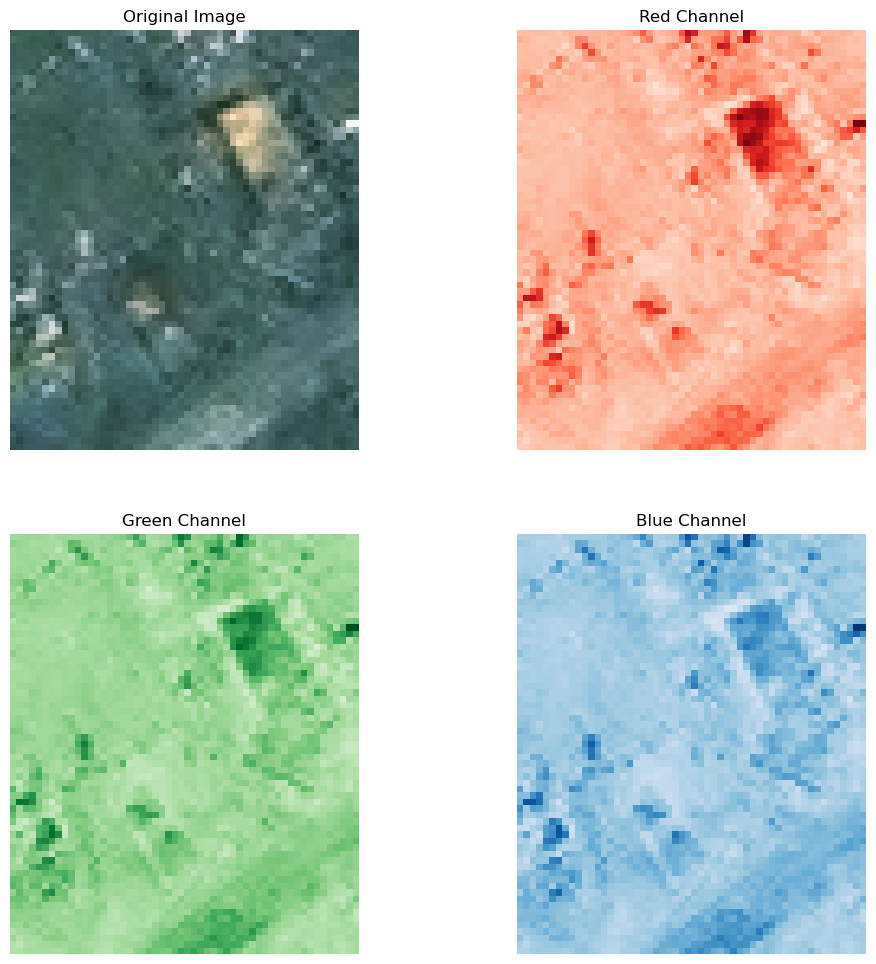

In [9]:
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(img[:, :, 0], cmap="Reds", vmin=0, vmax=255)
plt.title("Red Channel")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(img[:, :, 1], cmap="Greens", vmin=0, vmax=255)
plt.title("Green Channel")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(img[:, :, 2], cmap="Blues", vmin=0, vmax=255)
plt.title("Blue Channel")
plt.axis("off")

plt.show()

We can zoom in on just a pixel as well.

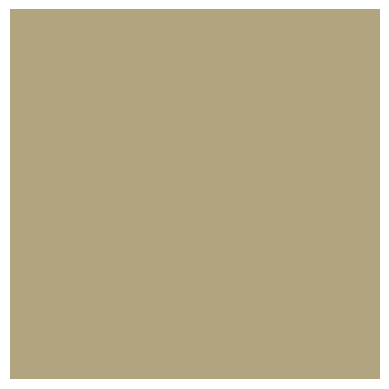

Pixel value: [177 165 128], coordinate: (15, 35)


In [10]:
coord = (15, 35)
pixel_value = img[coord[0], coord[1], :]
pixel_image = np.array([[pixel_value]])

plt.imshow(pixel_image)
plt.axis("off")
plt.show()

print(f"Pixel value: {pixel_value}, coordinate: {coord}")

# Extracting Edge and Texture Information

So far we have considered the **color** information in an image. However, other important aspects of an image are the edges and texture. 

Let us consider some popular feature processing methods for extracting edge and texture information. We will use the utilities provided in `feature_utils.py`.

In [11]:
from feature_utils import get_sobel_features, get_gabor_features, generate_gabor_kernel, get_local_binary_pattern

Let's try the Sobel Edge Filter. 

Read more about Sobel edge detection: https://en.wikipedia.org/wiki/Sobel_operator and https://scikit-image.org/docs/stable/auto_examples/edges/plot_edge_filter.html

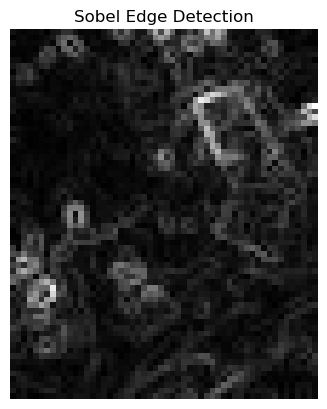

In [12]:
edges = get_sobel_features(img)
plt.imshow(edges, cmap="gray")
plt.title("Sobel Edge Detection")
plt.axis("off")
plt.show()

Now let's look at local binary patterns. 

Read more about LBP: https://en.wikipedia.org/wiki/Local_binary_patterns and https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_local_binary_pattern.html

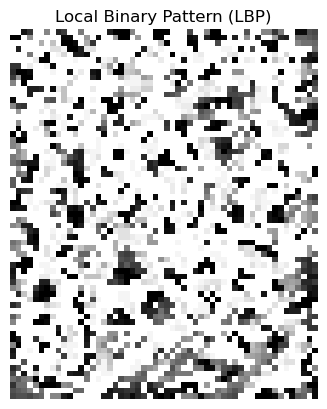

In [13]:
lbp = get_local_binary_pattern(img, radius=3)
plt.imshow(lbp, cmap="gray")
plt.axis("off")
plt.title("Local Binary Pattern (LBP)")
plt.show()

Another popular filter for image processing is the Gabor filter. The Gabor filters are a family of filters parametrized by orientation, frequency, bandwith, etc. Let's generate one such filter.

Read more about Gabor filters: https://en.wikipedia.org/wiki/Gabor_filter and https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_gabor.html

In [14]:
theta = 0
sigma = 1.0
frequency = 0.1

kernel = generate_gabor_kernel(theta, sigma, frequency)
gabor = get_gabor_features(img, kernel)

Let's visualize this filter (aka kernel) and the response of the image when we apply the filter. Concretely we are taking the convolution of the image with the filter. See https://en.wikipedia.org/wiki/Kernel_(image_processing) for more details.

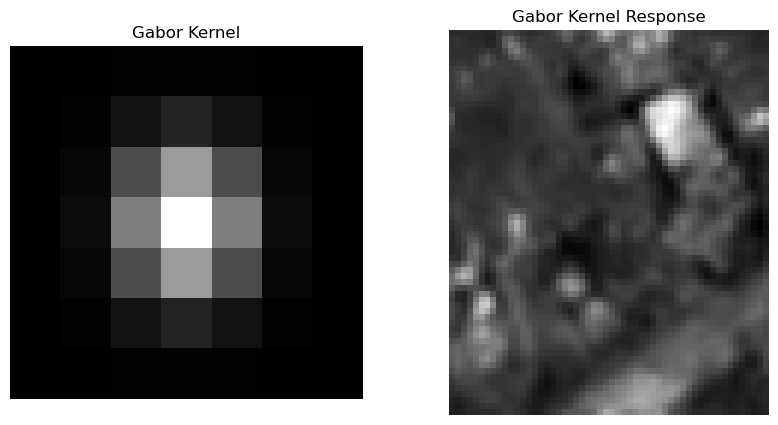

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# Plot Gabor Kernel
axs[0].imshow(kernel, cmap="gray")
axs[0].axis("off")  # Remove axis
axs[0].set_title("Gabor Kernel")

# Plot Gabor Kernel Response
axs[1].imshow(gabor, cmap="gray")
axs[1].axis("off")  # Remove axis
axs[1].set_title("Gabor Kernel Response")

plt.show()

# Exploratory Data Analysis

The agency would like you to start performing some exploratory data analysis to build an initial understanding of the data. As part of the exploratory data analysis, the agency is interested in understanding certain aspects of the dataset better. 

Feel free to add more cells as you see fit for your analysis. 

# EDA - Basic Statistics

## Number of Images per Disaster Type


In [39]:
label_counts = {}
for disaster in disaster_list:
    label_counts[disaster] = pd.Series(data[disaster]["labels"]).value_counts()

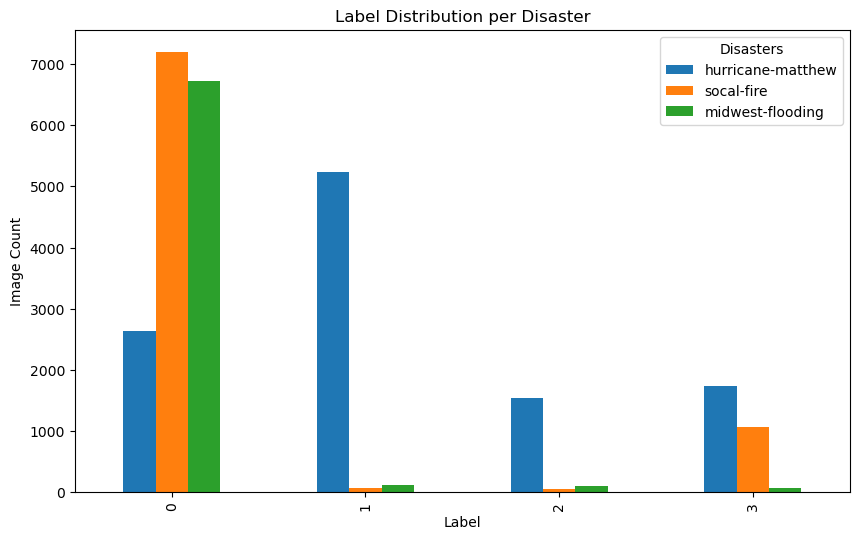

In [17]:
label_counts_df = pd.DataFrame(label_counts)
label_counts_df.plot(kind='bar', figsize=(10, 6), title="Label Distribution per Disaster")
plt.xlabel("Label")
plt.ylabel("Image Count")
plt.legend(title="Disasters")
plt.show()

## Distribution of Image Sizes in Each Dataset

In [18]:
# Function to get image dimensions
def get_image_sizes(images):
    return [(img.shape[0], img.shape[1]) for img in images]

# Collecting image sizes for each disaster dataset
image_sizes = {}
for disaster in disaster_list:
    image_sizes[disaster] = get_image_sizes(data[disaster]["images"])

# Convert to DataFrame for visualization
size_data = []
for disaster, sizes in image_sizes.items():
    for height, width in sizes:
        size_data.append({"Disaster": disaster, "Height": height, "Width": width})

size_df = pd.DataFrame(size_data)

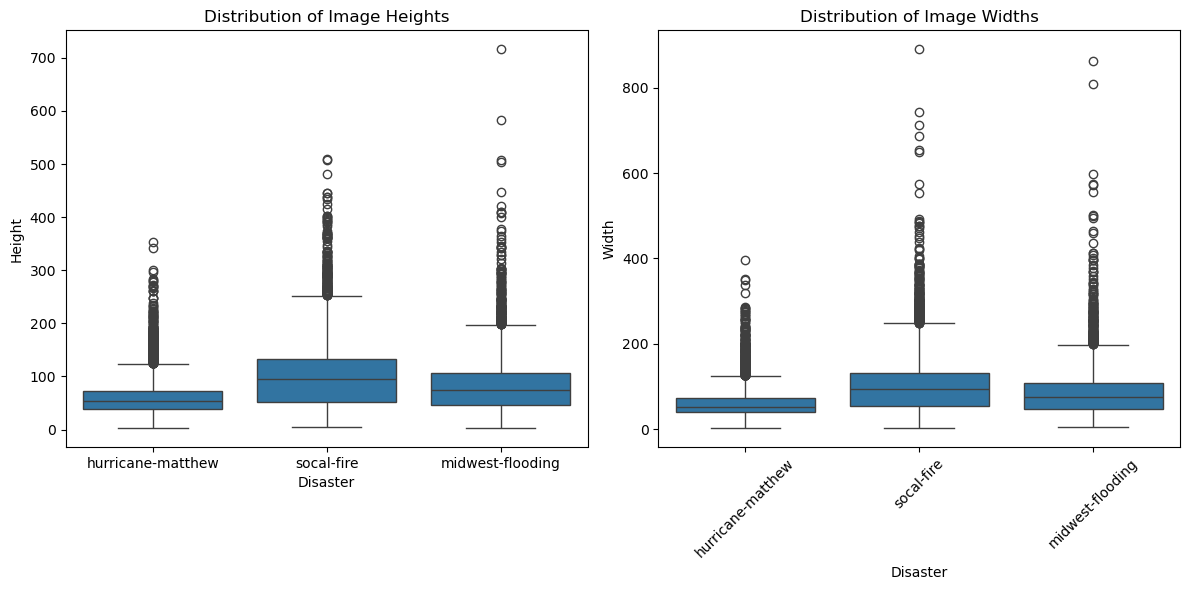

In [19]:
# Plot distribution of image heights and widths
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(x="Disaster", y="Height", data=size_df, ax=axes[0])
axes[0].set_title("Distribution of Image Heights")
plt.xticks(rotation=45)  # Use plt.xticks instead of set_xticklabels

sns.boxplot(x="Disaster", y="Width", data=size_df, ax=axes[1])
axes[1].set_title("Distribution of Image Widths")
plt.xticks(rotation=45)  # Use plt.xticks instead of set_xticklabels

plt.tight_layout()
plt.show()

## Distribution of Damage Labels

In [34]:
# Collecting label distributions for each disaster dataset
label_data = []
for disaster in disaster_list:
    labels = data[disaster]["labels"]
    unique, counts = np.unique(labels, return_counts=True)
    for label, count in zip(unique, counts):
        label_data.append({"Disaster": disaster, "Label": label, "Count": count})
label_df = pd.DataFrame(label_data)

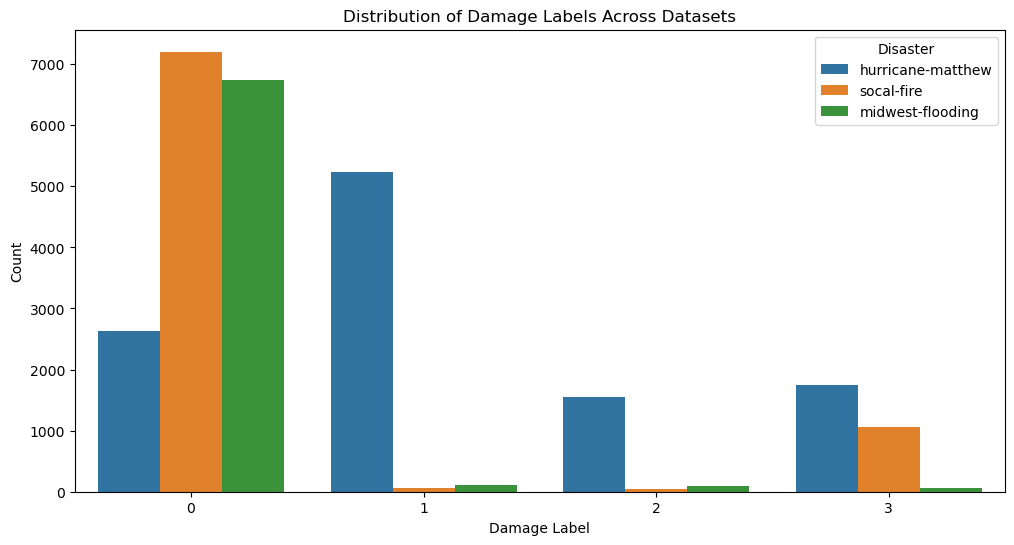

In [37]:
# Plot distribution of damage labels
plt.figure(figsize=(12, 6))
sns.barplot(x="Label", y="Count", hue="Disaster", data=label_df)
plt.title("Distribution of Damage Labels Across Datasets")
plt.xlabel("Damage Label")
plt.ylabel("Count")
plt.legend(title="Disaster", loc="upper right")
plt.show()

# EDA - Useful Image Features for Classification

The agency is looking for insights into useful image features for classifying images based on disaster type or damage level. You are tasked with verifying this and exploring whether color, edge, or texture features can effectively differentiate:

1. `midwest-flooding` from `socal-fire` images.
2. Damage levels 1 and 3 within the `hurricane-matthew` dataset.

Previous interns have found color information to be potentially useful.

## Distribution of Color (RGB)

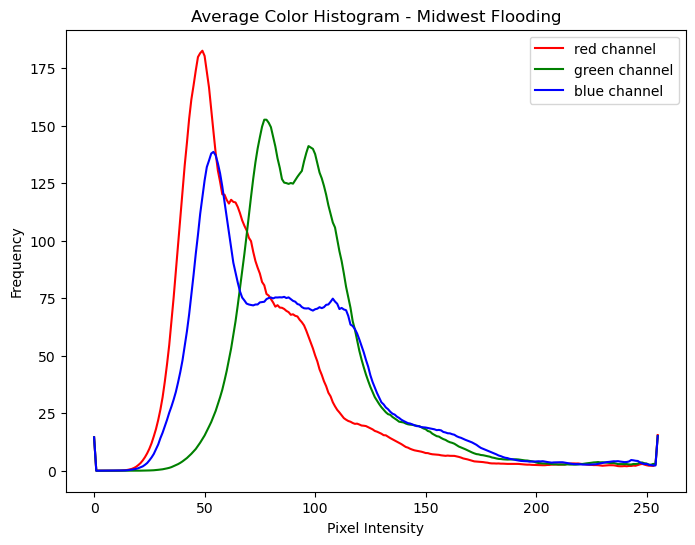

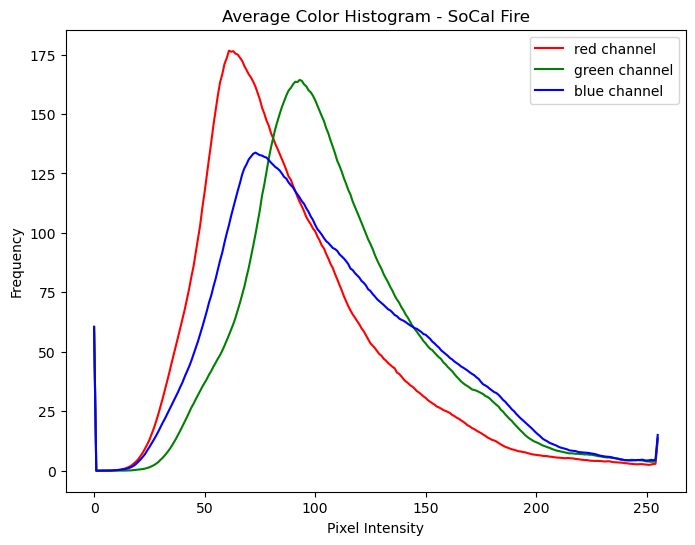

In [41]:
def plot_color_histogram(images, title):
    colors = ('red', 'green', 'blue')
    plt.figure(figsize=(8, 6))
    
    for i, color in enumerate(colors):
        hist = np.mean([np.histogram(img[:, :, i], bins=256, range=(0, 256))[0] for img in images], axis=0)
        plt.plot(hist, color=color, label=f"{color} channel")

    plt.title(f"Average Color Histogram - {title}")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

# Plot histograms for midwest-flooding vs socal-fire
plot_color_histogram(data["midwest-flooding"]["images"], "Midwest Flooding")
plot_color_histogram(data["socal-fire"]["images"], "SoCal Fire")

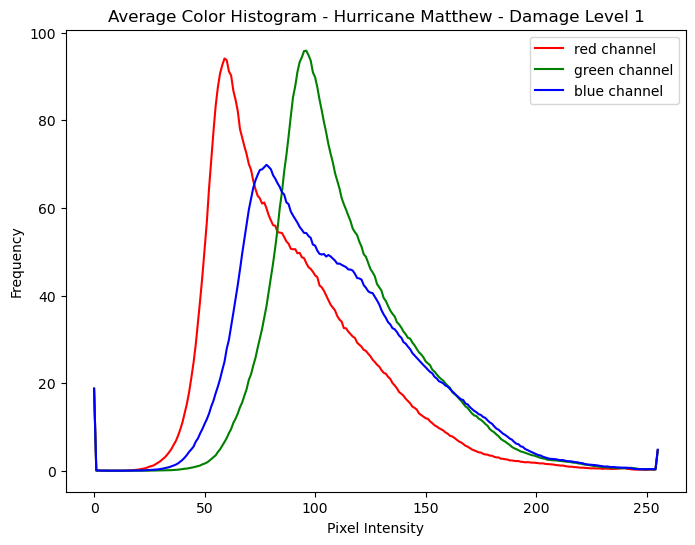

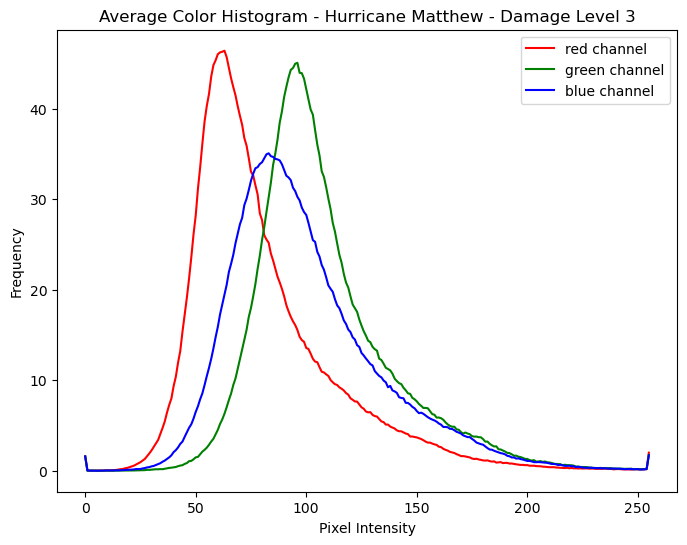

In [42]:
# Plot histograms for hurricane-matthew damage level 1 vs 3
hurricane_images = data["hurricane-matthew"]["images"]
hurricane_labels = data["hurricane-matthew"]["labels"]

plot_color_histogram([hurricane_images[i] for i in range(len(hurricane_labels)) if hurricane_labels[i] == 1], 
                     "Hurricane Matthew - Damage Level 1")

plot_color_histogram([hurricane_images[i] for i in range(len(hurricane_labels)) if hurricane_labels[i] == 3], 
                     "Hurricane Matthew - Damage Level 3")

## How are the distributions "separable"?

The below are a non-exhaustive list of ways we can think about classifying these disaster images. You do not have to include all of them in your analysis.

### 1. `midwest-flooding` vs `socal-fire`

Among the different disaster events, are there are distinctions in:

- image height, width, or overall size?
- RGB values?
- Sobel edges?
- Local Binary Patterns?
- Gabor kernels?



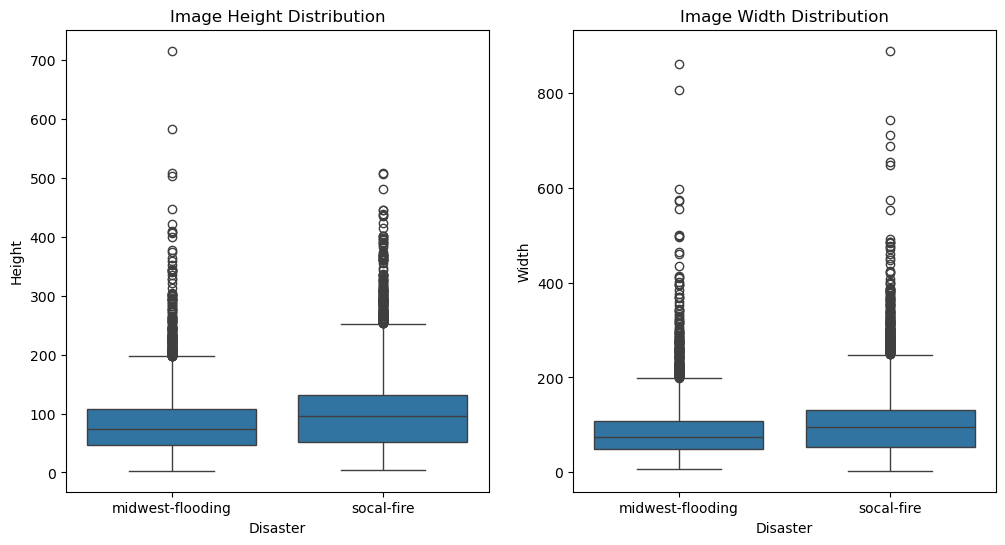

In [24]:
# Image Size
size_data = []
for disaster in ["midwest-flooding", "socal-fire"]:
    for img in data[disaster]["images"]:
        size_data.append({"Disaster": disaster, "Height": img.shape[0], "Width": img.shape[1]})

size_df = pd.DataFrame(size_data)

# Boxplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(x="Disaster", y="Height", data=size_df, ax=axes[0])
axes[0].set_title("Image Height Distribution")
sns.boxplot(x="Disaster", y="Width", data=size_df, ax=axes[1])
axes[1].set_title("Image Width Distribution")

plt.show()

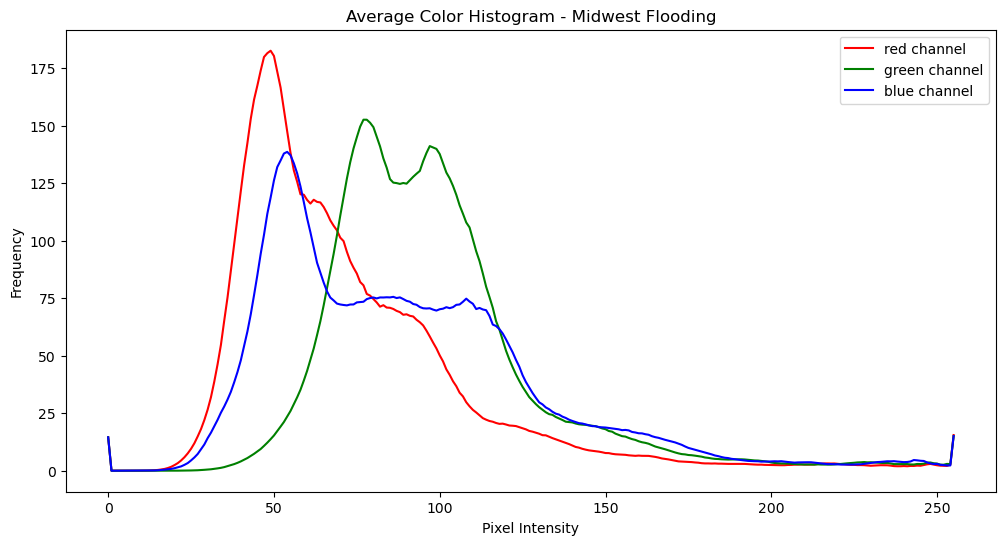

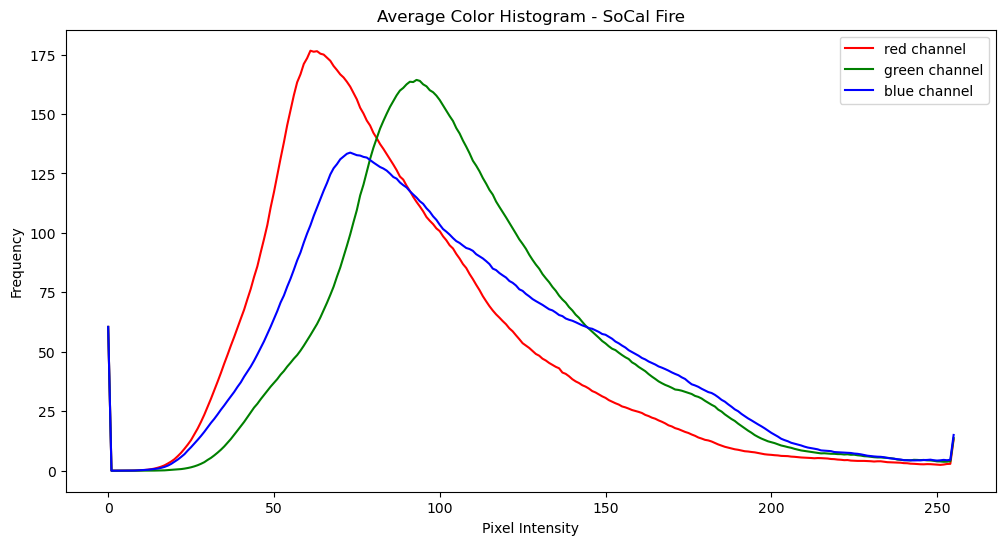

In [25]:
# RGB values
plot_color_histogram(data["midwest-flooding"]["images"], "Midwest Flooding")
plot_color_histogram(data["socal-fire"]["images"], "SoCal Fire")

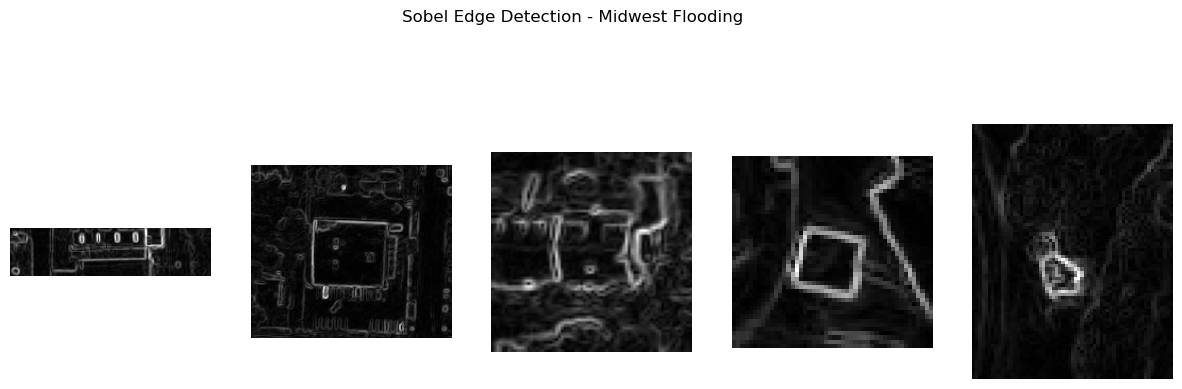

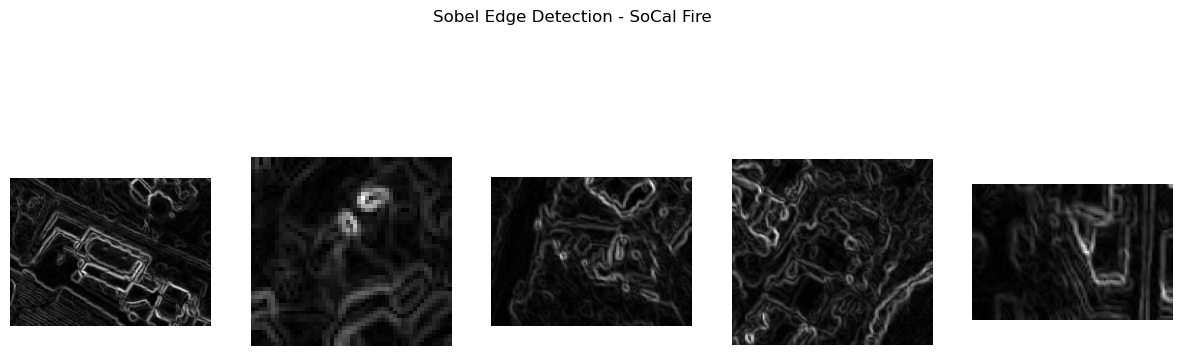

In [26]:
# Sobel Edges
from scipy.ndimage import sobel
def apply_sobel(images, title):
    fig, axes = plt.subplots(1, 5, figsize=(15, 5))

    for i, img in enumerate(images[:5]):  # Show 5 samples
        gray = np.mean(img, axis=-1)
        sobel_x = sobel(gray, axis=0)
        sobel_y = sobel(gray, axis=1)
        sobel_edges = np.hypot(sobel_x, sobel_y)

        axes[i].imshow(sobel_edges, cmap="gray")
        axes[i].axis("off")

    plt.suptitle(f"Sobel Edge Detection - {title}")
    plt.show()
apply_sobel(data["midwest-flooding"]["images"], "Midwest Flooding")
apply_sobel(data["socal-fire"]["images"], "SoCal Fire")

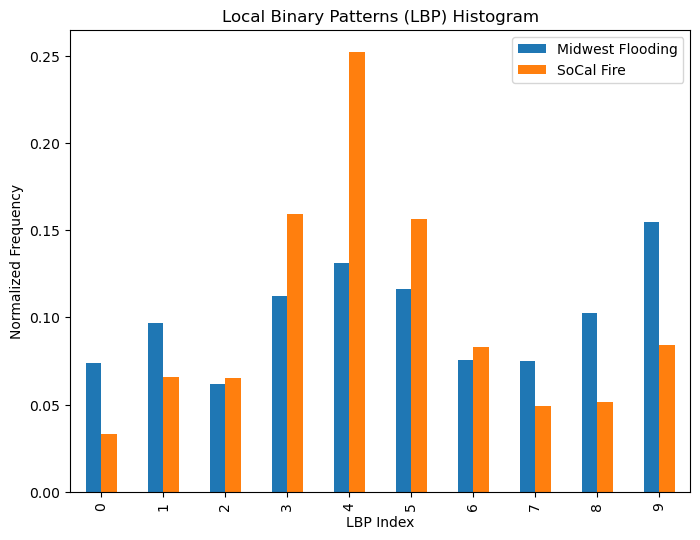

In [27]:
# LBP
from skimage.feature import local_binary_pattern
def compute_lbp_hist(images):
    """Compute LBP histograms without OpenCV."""
    lbp_histograms = []

    for img in images[:50]:  # Sample 50 images
        gray = np.mean(img, axis=-1)  # Convert to grayscale using NumPy
        lbp = local_binary_pattern(gray, P=8, R=1, method="uniform")
        hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, 11), density=True)
        lbp_histograms.append(hist)

    return np.mean(lbp_histograms, axis=0)

# LBP histograms
lbp_flooding = compute_lbp_hist(data["midwest-flooding"]["images"])
lbp_fire = compute_lbp_hist(data["socal-fire"]["images"])
lbp_df = pd.DataFrame({"LBP Index": np.arange(10),
                       "Midwest Flooding": lbp_flooding,
                       "SoCal Fire": lbp_fire})

lbp_df.set_index("LBP Index").plot(kind="bar", figsize=(8, 6), title="Local Binary Patterns (LBP) Histogram")
plt.ylabel("Normalized Frequency")
plt.show()

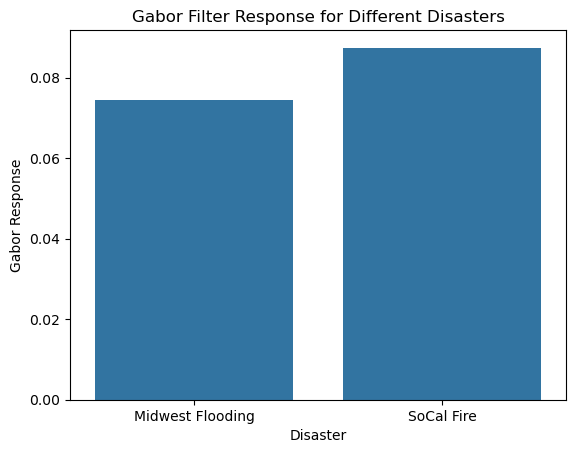

In [28]:
# Gabor kernels
from skimage.filters import gabor

def compute_gabor_features(images):
    gabor_responses = []

    for img in images[:50]:
        gray = np.mean(img, axis=-1)
        gabor_real, _ = gabor(gray, frequency=0.2, theta=np.pi / 4)
        gabor_responses.append(np.mean(gabor_real))

    return np.mean(gabor_responses)

# Compute Gabor features
gabor_flooding = compute_gabor_features(data["midwest-flooding"]["images"])
gabor_fire = compute_gabor_features(data["socal-fire"]["images"])

# Bar plot of Gabor features
gabor_df = pd.DataFrame({"Disaster": ["Midwest Flooding", "SoCal Fire"],
                         "Gabor Response": [gabor_flooding, gabor_fire]})

sns.barplot(x="Disaster", y="Gabor Response", data=gabor_df)
plt.title("Gabor Filter Response for Different Disasters")
plt.show()

### 2. Damage levels 1 vs 3 within the `hurricane-matthew` dataset

Is there a relationship between the damage level and:

- image height, width, or overall size?
- RGB values?
- Sobel edges?
- Local Binary Patterns?
- Gabor kernels?

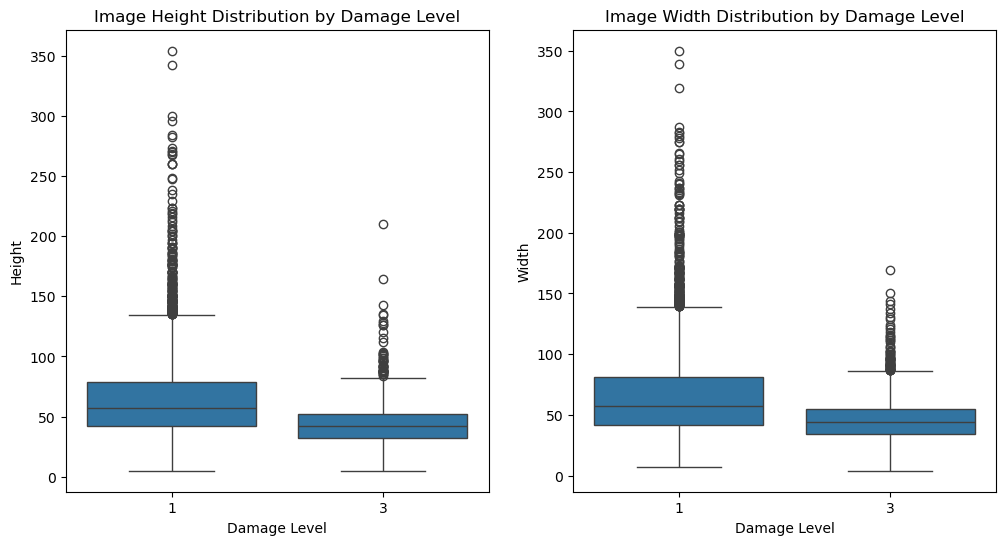

In [29]:
# Image size
size_data = []
hurricane_images = data["hurricane-matthew"]["images"]
hurricane_labels = data["hurricane-matthew"]["labels"]

for i in range(len(hurricane_labels)):
    if hurricane_labels[i] in [1, 3]:  # Only take damage levels 1 & 3
        size_data.append({
            "Damage Level": hurricane_labels[i],
            "Height": hurricane_images[i].shape[0],
            "Width": hurricane_images[i].shape[1]
        })

size_df = pd.DataFrame(size_data)

# Boxplots for image size distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(x="Damage Level", y="Height", data=size_df, ax=axes[0])
axes[0].set_title("Image Height Distribution by Damage Level")

sns.boxplot(x="Damage Level", y="Width", data=size_df, ax=axes[1])
axes[1].set_title("Image Width Distribution by Damage Level")

plt.show()

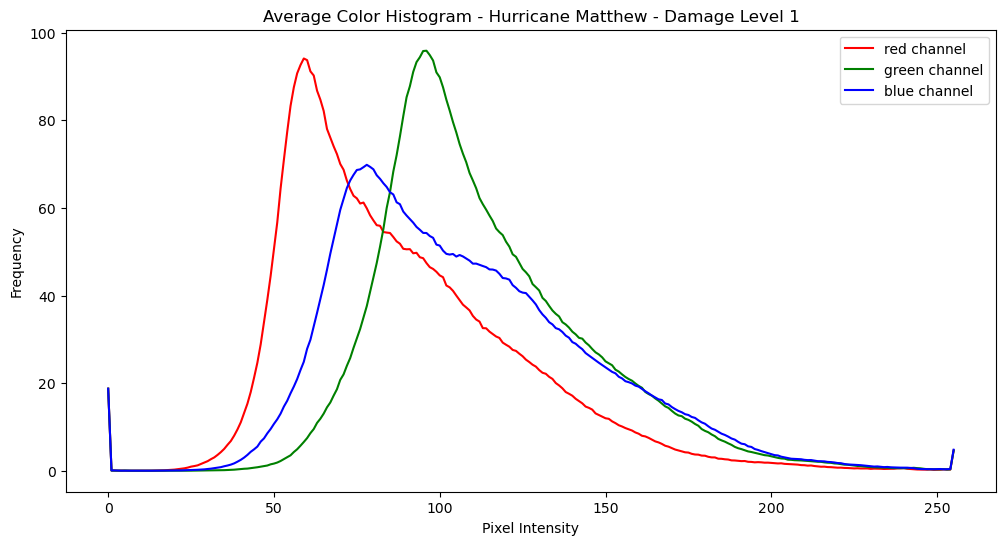

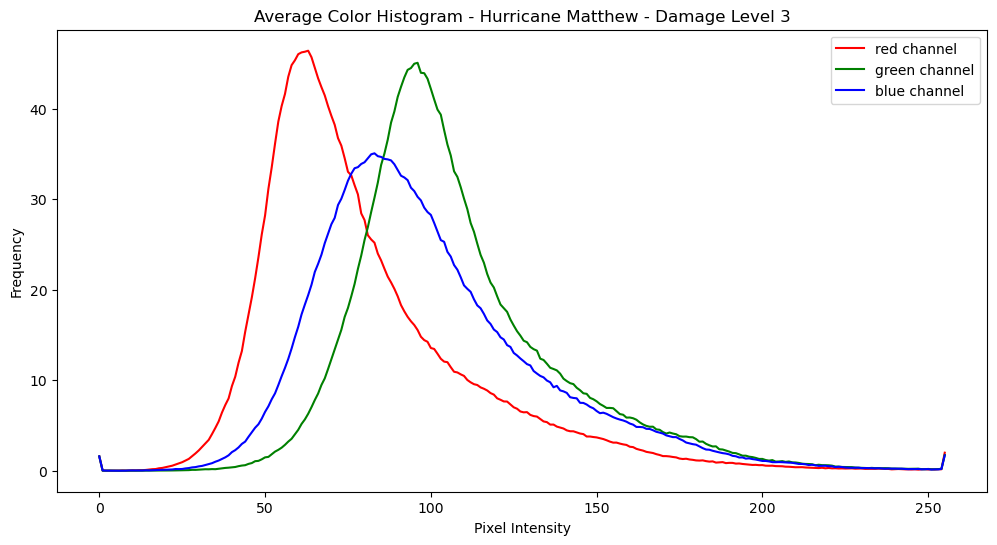

In [30]:
# RGB
hurricane_images = data["hurricane-matthew"]["images"]
hurricane_labels = data["hurricane-matthew"]["labels"]

plot_color_histogram([hurricane_images[i] for i in range(len(hurricane_labels)) if hurricane_labels[i] == 1], 
                     "Hurricane Matthew - Damage Level 1")

plot_color_histogram([hurricane_images[i] for i in range(len(hurricane_labels)) if hurricane_labels[i] == 3], 
                     "Hurricane Matthew - Damage Level 3")

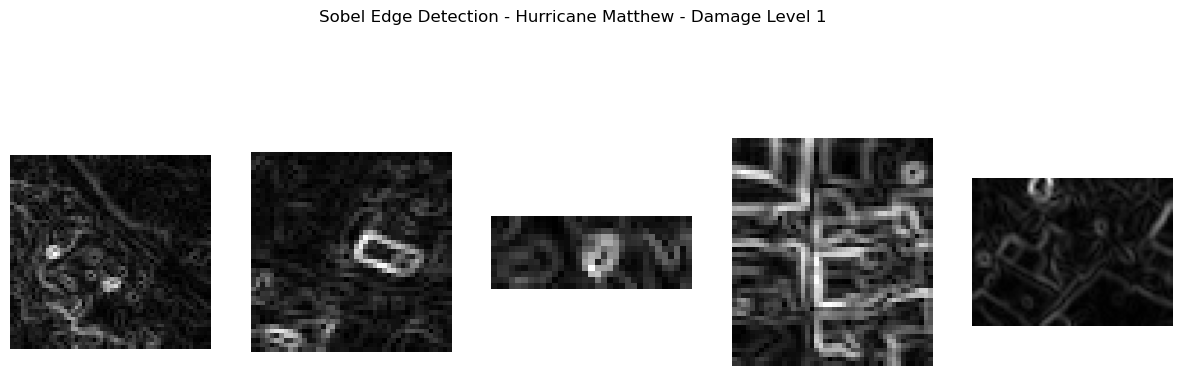

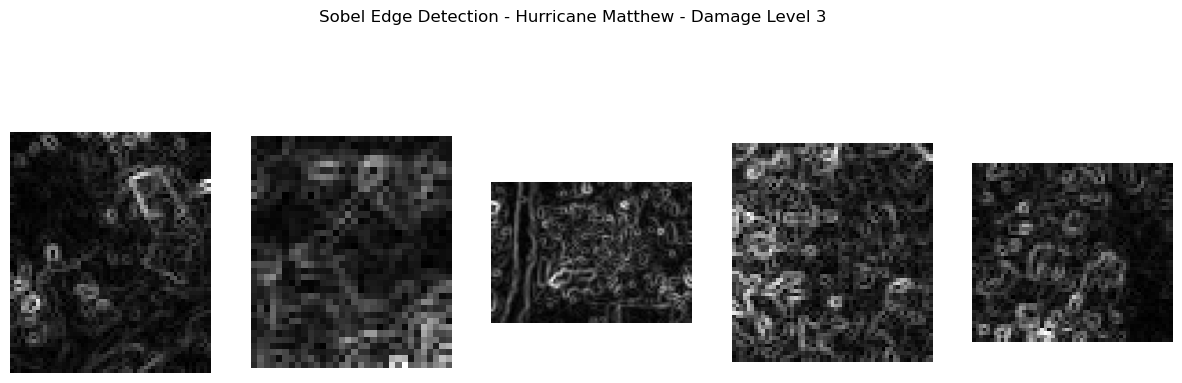

In [31]:
# Sobel
from scipy.ndimage import sobel

def apply_sobel_damage(images, labels, damage_level, title):
    selected_images = [images[i] for i in range(len(labels)) if labels[i] == damage_level][:5]

    fig, axes = plt.subplots(1, 5, figsize=(15, 5))
    for i, img in enumerate(selected_images):
        gray = np.mean(img, axis=-1)  # Convert to grayscale using NumPy
        sobel_x = sobel(gray, axis=0)
        sobel_y = sobel(gray, axis=1)
        sobel_edges = np.hypot(sobel_x, sobel_y)  # Combine x & y edges

        axes[i].imshow(sobel_edges, cmap="gray")
        axes[i].axis("off")

    plt.suptitle(f"Sobel Edge Detection - {title}")
    plt.show()

# Apply Sobel edge detection
apply_sobel_damage(hurricane_images, hurricane_labels, 1, "Hurricane Matthew - Damage Level 1")
apply_sobel_damage(hurricane_images, hurricane_labels, 3, "Hurricane Matthew - Damage Level 3")

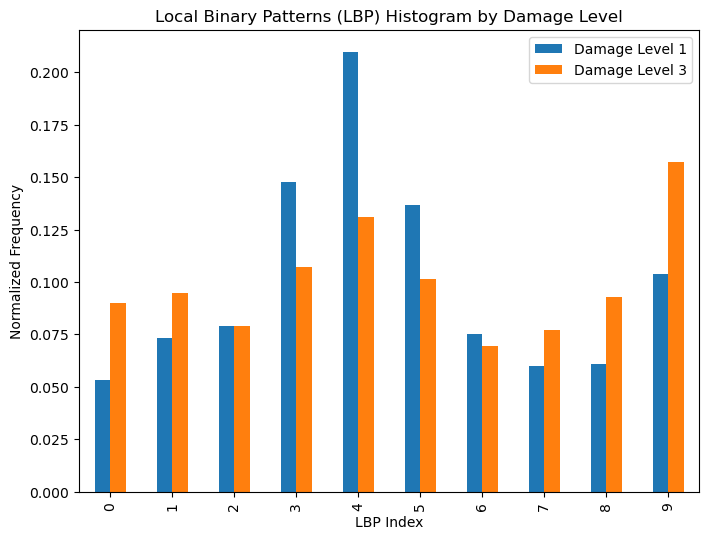

In [32]:
# LBP
from skimage.feature import local_binary_pattern

def compute_lbp_hist_damage(images, labels, damage_level):
    selected_images = [images[i] for i in range(len(labels)) if labels[i] == damage_level][:50]
    lbp_histograms = []

    for img in selected_images:
        gray = np.mean(img, axis=-1)  # Convert to grayscale using NumPy
        lbp = local_binary_pattern(gray, P=8, R=1, method="uniform")
        hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, 11), density=True)
        lbp_histograms.append(hist)

    return np.mean(lbp_histograms, axis=0)

# Compute LBP histograms
lbp_damage_1 = compute_lbp_hist_damage(hurricane_images, hurricane_labels, 1)
lbp_damage_3 = compute_lbp_hist_damage(hurricane_images, hurricane_labels, 3)

# Plot LBP distributions
lbp_df = pd.DataFrame({"LBP Index": np.arange(10),
                       "Damage Level 1": lbp_damage_1,
                       "Damage Level 3": lbp_damage_3})

lbp_df.set_index("LBP Index").plot(kind="bar", figsize=(8, 6), title="Local Binary Patterns (LBP) Histogram by Damage Level")

plt.ylabel("Normalized Frequency")
plt.show()

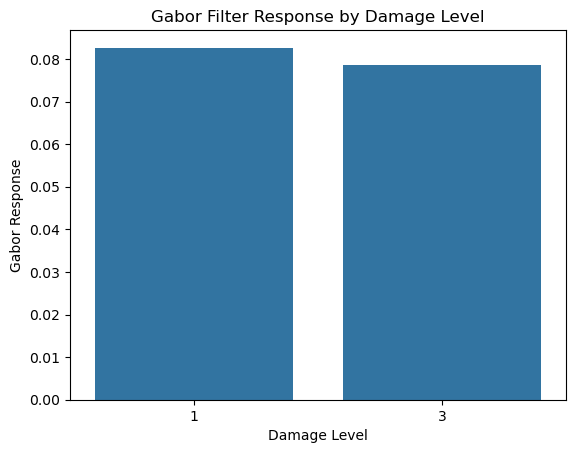

In [33]:
# Gabor
from skimage.filters import gabor
def compute_gabor_features_damage(images, labels, damage_level):
    selected_images = [images[i] for i in range(len(labels)) if labels[i] == damage_level][:50]
    gabor_responses = []

    for img in selected_images:
        gray = np.mean(img, axis=-1)  # Convert to grayscale using NumPy
        gabor_real, _ = gabor(gray, frequency=0.2, theta=np.pi / 4)  # Example filter
        gabor_responses.append(np.mean(gabor_real))

    return np.mean(gabor_responses)

# Compute Gabor features
gabor_damage_1 = compute_gabor_features_damage(hurricane_images, hurricane_labels, 1)
gabor_damage_3 = compute_gabor_features_damage(hurricane_images, hurricane_labels, 3)

# Bar plot for Gabor feature response
gabor_df = pd.DataFrame({"Damage Level": ["1", "3"],
                         "Gabor Response": [gabor_damage_1, gabor_damage_3]})

sns.barplot(x="Damage Level", y="Gabor Response", data=gabor_df)
plt.title("Gabor Filter Response by Damage Level")
plt.show()